# 보스턴 집값 예측

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [4]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#전처리

In [9]:
target = 'medv'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

## Decision Tree

In [14]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeRegressor(max_depth=5,  random_state=1)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

# 기록
result = {}
result['Decision Tree'] = cv_score.mean()

# 확인
result

[0.71324458 0.70845361 0.92449088 0.7871317  0.44286874 0.83884093
 0.69782724 0.82941149 0.79137522 0.91470248]
평균: 0.7648346872531953
표준편차: 0.13145019436013816


{'Decision Tree': 0.7648346872531953}

# 선형 회귀

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['Linear Regression'] = cv_score.mean()

result

[0.5902904  0.41961248 0.83104808 0.6505844  0.77425826 0.5677654
 0.67492701 0.77482185 0.57495364 0.82335863]
평균: 0.6681620144824076
표준편차: 0.12657546003600817


{'Decision Tree': 0.7648346872531953, 'Linear Regression': 0.6681620144824076}

# KNN

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

model = KNeighborsRegressor()

cv_score = cross_val_score(model, x_train_s, y_train, cv=10, scoring='r2')

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['KNN'] = cv_score.mean()

result

[0.65736358 0.52515086 0.75283937 0.44262082 0.78083425 0.64172252
 0.56042514 0.65223096 0.4254619  0.81733353]
평균: 0.6255982942610578
표준편차: 0.12919047046510435


{'Decision Tree': 0.7648346872531953,
 'Linear Regression': 0.6681620144824076,
 'KNN': 0.6255982942610578}

# 성능 비교(시각화)

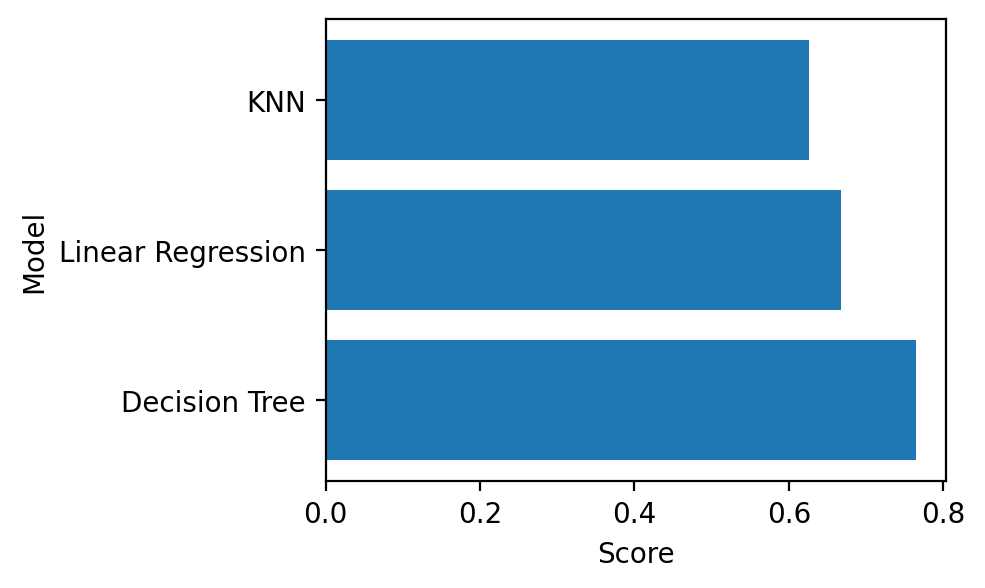

In [17]:
plt.figure(figsize=(4,3))
plt.barh(y=list(result), width=result.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()